# POTATO Disease Classification Using CNN.

Potato Have two different types of disease
- Early blight
- Late Blight

Our problem is 3 class classification. Healthy, Early_blight and Late_blight.

### Dependencies


In [23]:
import tensorflow as tf
from tensorflow.keras import models, layers, Sequential
import matplotlib.pyplot as plt
import numpy as np

### Constants in Program

In [24]:
IMAGE_SIZE = 256
CHANNELS=3
BATCH_SIZE = 32
EPOCHS=20

In [25]:


dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed=123,               # Save the order of Shuffling
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2148 files belonging to 3 classes.


### Total Classes for Classifcation

In [26]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

### Label and Image of 1 batch size

In [40]:
for image_batch, labels_batch in dataset.take(1):
    print(class_names[labels_batch[31]])
    print(image_batch.shape)

Potato___Early_blight
(32, 256, 256, 3)


### Visualizing Dataset

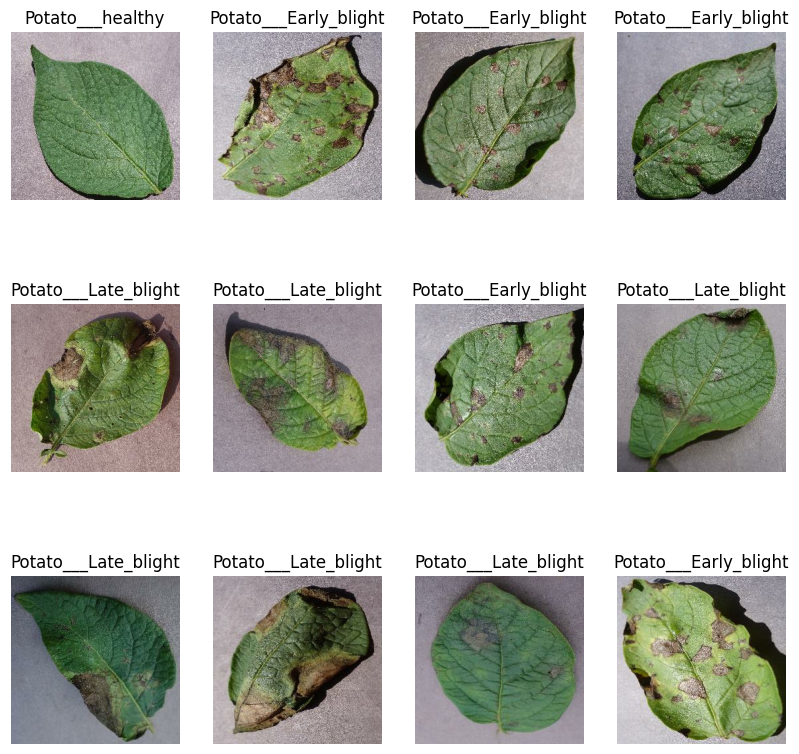

In [65]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

### Len of dataset

In [42]:
print(len(dataset))                    # Number of Batches
total_images = len(dataset) * 32
print(total_images)

68
2176


### Train, Test Split: 
80% for Training and 10% for Validation and 10% for Testing

train_size = 0.8
len(dataset)*train_size

In [10]:
def get_dataset_partitions(dataset, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):      
    assert (train_split + test_split + val_split) == 1
    ds_size = len(dataset)                                                 
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

 

In [11]:
train_ds, val_ds, test_ds = get_dataset_partitions_(dataset)

In [43]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

54
6
8


In [44]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

### Data Augmentation

In [46]:
resize_and_rescale = Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [49]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])



In [48]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

### Developing the CNN Model

In [51]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [52]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (32, 60, 60, 64)         

### Compiling Model and and 
- Optimzer used is Adam
- Loss is  with CrossEntropy.

In [54]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [55]:
result= model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=2,
    epochs=20,
)

Epoch 1/20
54/54 - 145s - loss: 0.9221 - accuracy: 0.4682 - val_loss: 0.8992 - val_accuracy: 0.4479 - 145s/epoch - 3s/step
Epoch 2/20
54/54 - 117s - loss: 0.7273 - accuracy: 0.6227 - val_loss: 0.6570 - val_accuracy: 0.6875 - 117s/epoch - 2s/step
Epoch 3/20
54/54 - 107s - loss: 0.4191 - accuracy: 0.8084 - val_loss: 0.3587 - val_accuracy: 0.8594 - 107s/epoch - 2s/step
Epoch 4/20
54/54 - 115s - loss: 0.3267 - accuracy: 0.8715 - val_loss: 0.2227 - val_accuracy: 0.9115 - 115s/epoch - 2s/step
Epoch 5/20
54/54 - 113s - loss: 0.2766 - accuracy: 0.8924 - val_loss: 0.3313 - val_accuracy: 0.8646 - 113s/epoch - 2s/step
Epoch 6/20
54/54 - 115s - loss: 0.2318 - accuracy: 0.9091 - val_loss: 0.4018 - val_accuracy: 0.8385 - 115s/epoch - 2s/step
Epoch 7/20
54/54 - 113s - loss: 0.1921 - accuracy: 0.9213 - val_loss: 0.2294 - val_accuracy: 0.9115 - 113s/epoch - 2s/step
Epoch 8/20
54/54 - 104s - loss: 0.2378 - accuracy: 0.9068 - val_loss: 0.3225 - val_accuracy: 0.8802 - 104s/epoch - 2s/step
Epoch 9/20
54/54

### Evaluating the Model

In [56]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 12s 1s/step - loss: 0.0966 - accuracy: 0.9648


In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

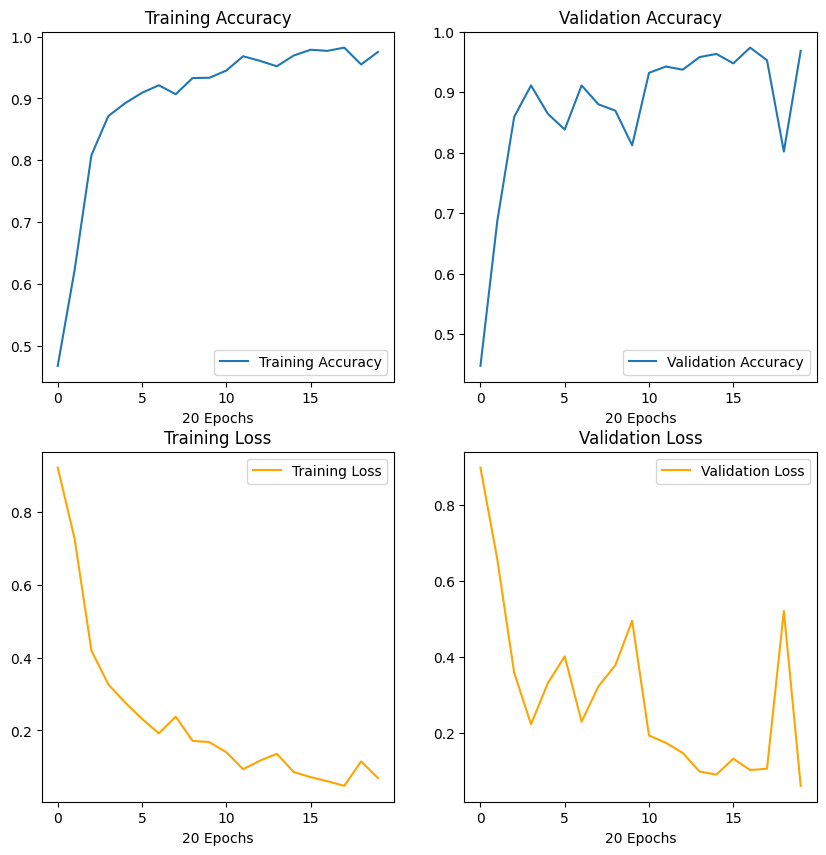

In [74]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')
plt.xlabel('20 Epochs')

plt.subplot(2, 2, 2)
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Accuracy')
plt.xlabel('20 Epochs')

plt.subplot(2, 2, 3)
plt.plot(range(EPOCHS), loss, label='Training Loss', c='orange')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.xlabel('20 Epochs')

plt.subplot(2, 2, 4)
plt.plot(range(EPOCHS), val_loss, label='Validation Loss', c='orange')
plt.legend(loc='upper right')
plt.title('Validation Loss')
plt.xlabel('20 Epochs')

plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 2s 2s/step
predicted label: Potato___Late_blight


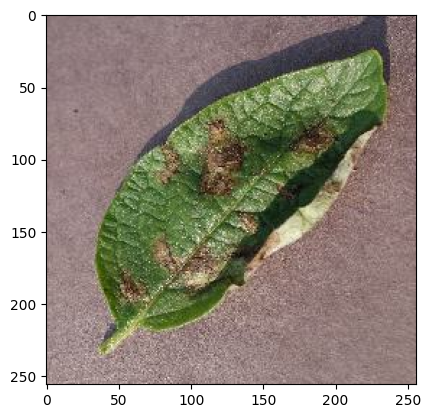

In [59]:

for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [60]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 88ms/step


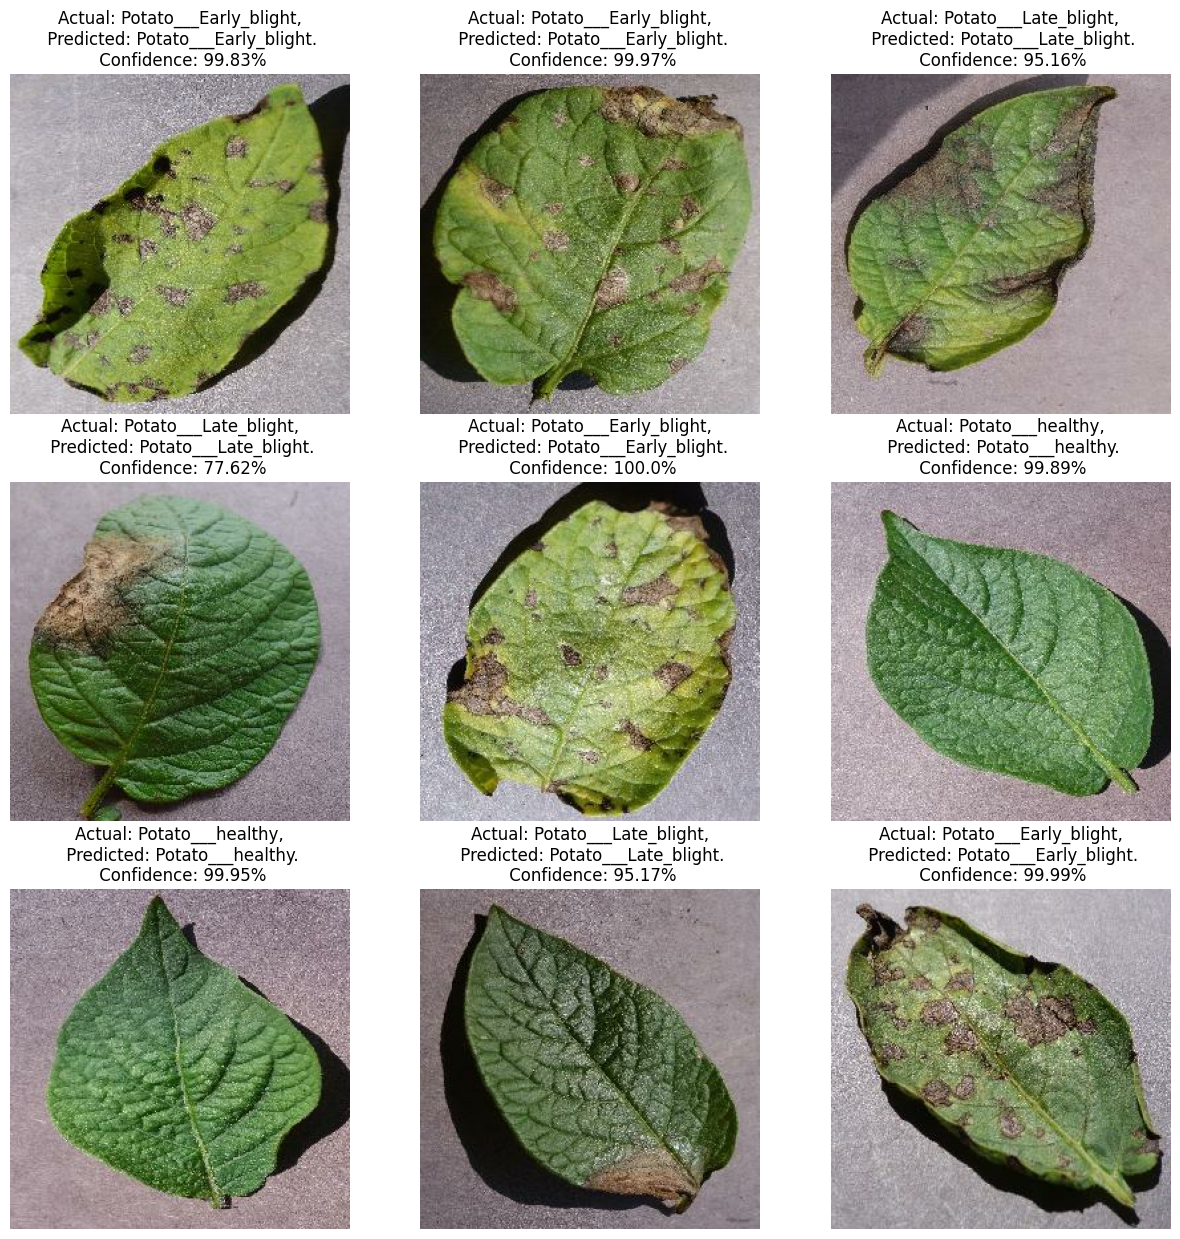

In [63]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [64]:
model.save("./potatoes.h5")